# Dutch Energy EDA
#### Looking at three different companies for the year 2018 to see if we can find anything interesting. 
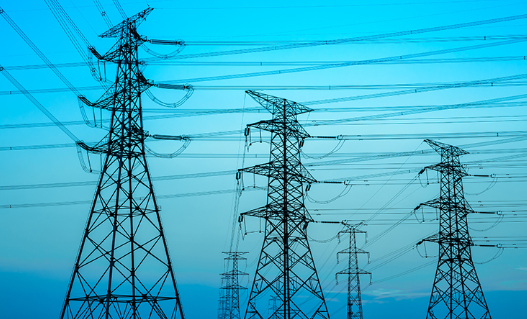

Image taken from fuergy.com

[Link to Kaggle Dataset](https://www.kaggle.com/datasets/lucabasa/dutch-energy)

## The columns definitions:

* net_manager: code of the regional network manager

* purchase_area: code of the area where the energy is purchased

* street: Name of the street

* zipcode_from and zipcode_to: 2 columns for the range of zipcodes covered, 4 numbers and 2 letters

* city: Name of the city

* num_connections: Number of connections in the range of zipcodes

* delivery_perc: percentage of net consumption of electricity. The lower, the more energy was given back to the grid (for example if you have solar panels)

* perc_of_active_connections: Percentage of active connections in the zipcode range

* type_of_connection: principal type of connection in the zipcode range. For electricity is # fuses X # ampère. 

* type_conn_perc: percentage of presence of the principal type of connection in the zipcode range

* annual_consume: Annual consume. Kwh for electricity, m3 for gas

* annual_consume_lowtarif_perc: Percentage of consume during the low tarif hours. From 10 p.m. to 7 a.m. and during weekends.

* smartmeter_perc: percentage of smartmeters in the zipcode ranges


Taken from the Kaggle Dataset link directly

---

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

df_1 = pd.read_csv('coteq_electricity_2018.csv')
df_2 = pd.read_csv('enduriselectricity_01012018.csv')
df_3 = pd.read_csv('enexis_electricity_01012018.csv')

# Taking a sample of 1000 for each dataframe, to get an even distribution.
df_1 = df_1.sample(1000)
df_2 = df_2.sample(1000)
df_3 = df_3.sample(1000)

# Let's inspect each dataframe one by one to see what we need to clean up.
# This one looks fine.
df_1.head(1)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
1463,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Strauszstraat,7604HK,7604HK,ALMELO,16,100.0,100.0,88,1x35,3354,93.75,0.0


--- 
## Concatination

In [31]:
# Looks like we need to remove the NETBEHEERDER (Administrator) column, since 
# It appears that this net_manager is in id format. We can fix to broadcast this.
df_2.head(1)

,ï»¿NETBEHEERDER,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
6798,8716902000001,Enduris Netgebied,Schoneveld,4511HV,4511HV,BRESKENS,232,94.4,100.0,"89,22",1x35,983,16.38,0.0


In [32]:
# Now we looked at each of the dataframes, let's change the 
# df_2 net administrator column.

# Renaming the column.
df_2.rename(columns={df_2.columns[0]: 'net_manager'}, inplace=True)

# Assigning each row to a column to a value
# in this case, every row in the column net_manager to Endurise BV
df_2 = df_2.assign(net_manager = 'Endurise BV')
df_2.head(1)


,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
6798,Endurise BV,Enduris Netgebied,Schoneveld,4511HV,4511HV,BRESKENS,232,94.4,100.0,"89,22",1x35,983,16.38,0.0


In [33]:
# Concatenating the three datasets together
df = pd.concat([df_1, df_2, df_3])
df = df.reset_index(drop=True)
df.head(1)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Strauszstraat,7604HK,7604HK,ALMELO,16,100.0,100.0,88,1x35,3354.0,93.75,0.0


--- 
## Data Cleaning

In [34]:
# Checking Nan values
df.isna().sum()

net_manager                     0
purchase_area                   0
street                          0
zipcode_from                    0
zipcode_to                      0
city                            0
num_connections                 0
delivery_perc                   1
perc_of_active_connections      0
type_conn_perc                  0
type_of_connection              0
annual_consume                  0
annual_consume_lowtarif_perc    0
smartmeter_perc                 0
dtype: int64

In [35]:
# Dropping a few columns that aren't useful.
df = df.drop(['zipcode_from','zipcode_to', 'purchase_area','annual_consume_lowtarif_perc','type_conn_perc'], axis=1)
df.head(3)

,net_manager,street,city,num_connections,delivery_perc,perc_of_active_connections,type_of_connection,annual_consume,smartmeter_perc
0,Coteq Netbeheer BV,Strauszstraat,ALMELO,16,100.00,100.00,1x35,3354.0,0.0
1,Coteq Netbeheer BV,Bornerbroeksestraat,ALMELO,24,83.33,95.83,1x35,13077.0,0.0
2,Coteq Netbeheer BV,Grovestins,ALMELO,23,91.30,100.00,1x35,2916.0,0.0


---
## EDA

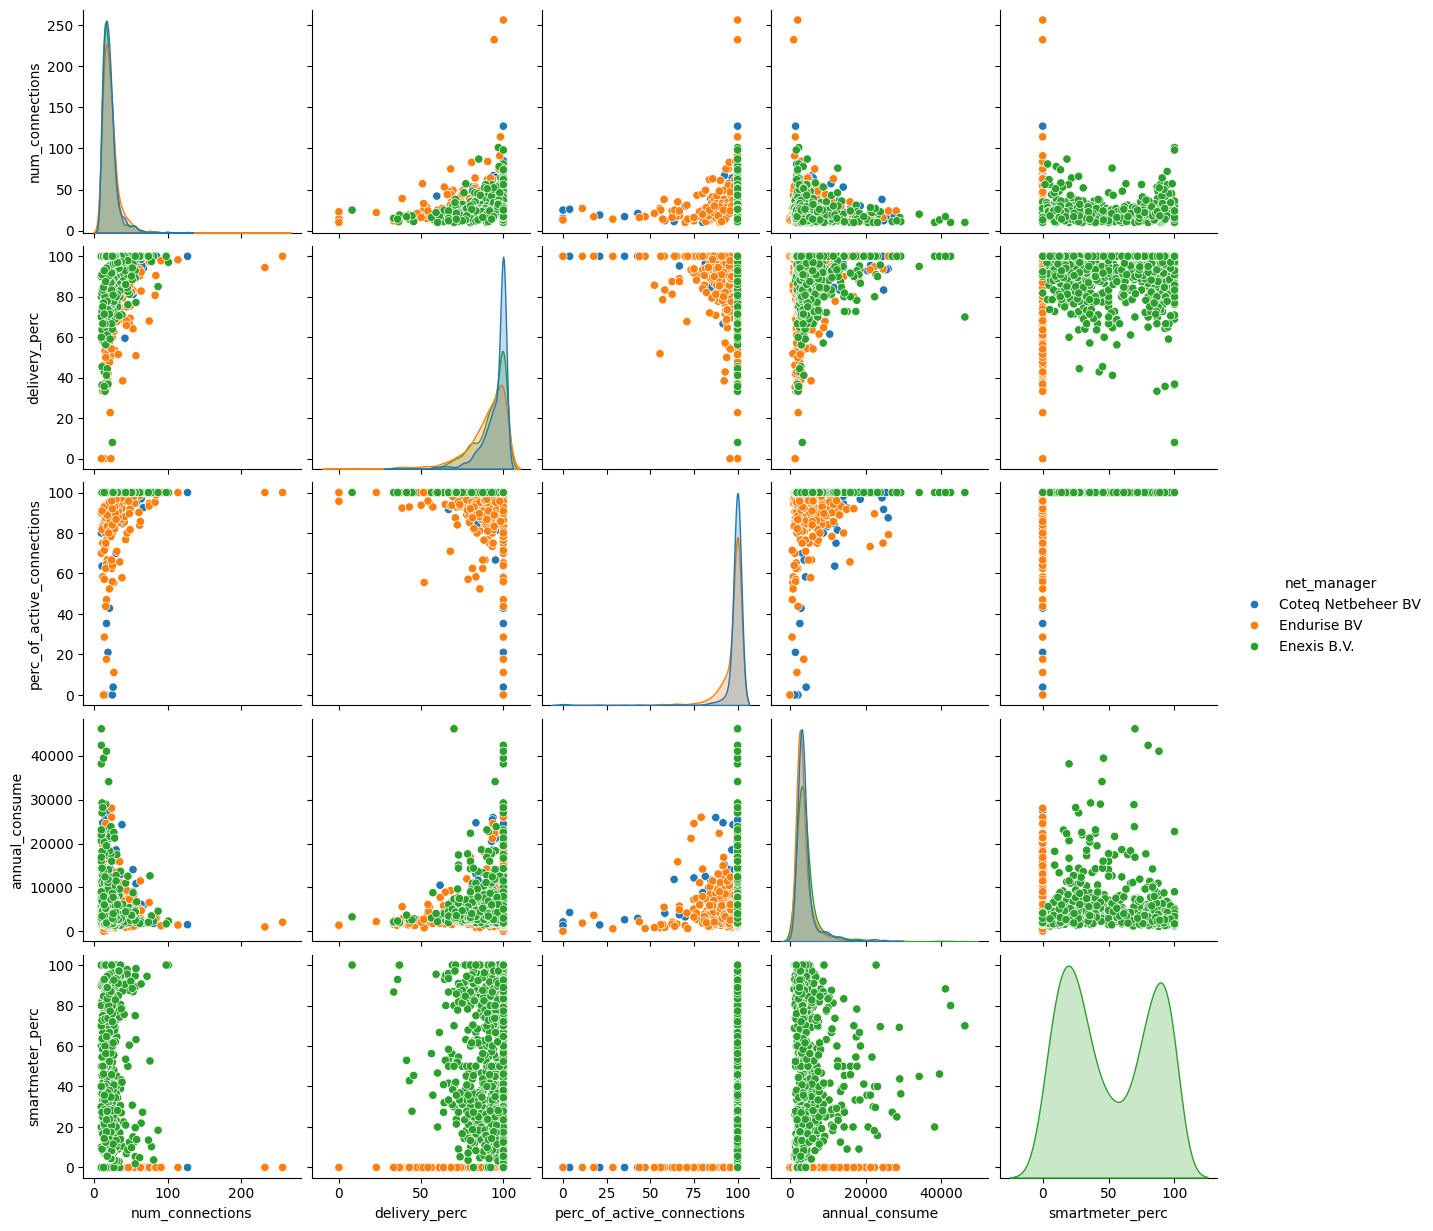

In [36]:
# Pairplot
sns.pairplot(data = df, hue='net_manager')
# Observations: 

# There appears to be something unique about Enexis B.V.
# % active connections appears to be 100 across the board.

# Enexis B.V. also seems to be the only electricity company out of 
# These three that has smartmeter customers. (I will need to look into
# what a smartmeter)

#  delivery_perc: percentage of net consumption of electricity. The lower, the more energy was given back to the grid (for example if you have solar panels)

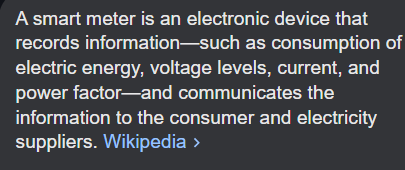

Found via a google search, source: Wikipedia

| Note: |
| --- |
| I have seen a lot of these around in Finland. This begs the question, do we get any extra information from these smart meters that we can use in this dataset? We will also have to keep in mind that there may be some extraeneous variables that might skew the data. |

<Axes: >

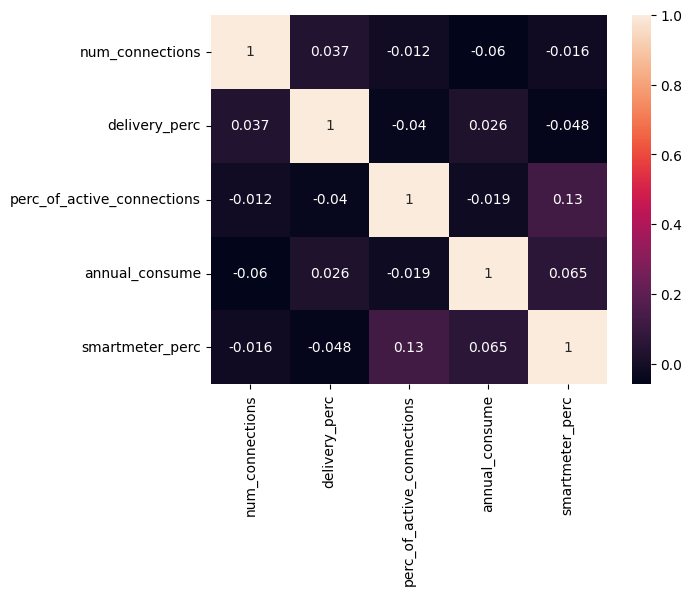

In [37]:
# Heatmap
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True)

# Nothing of note.

In [38]:
# Let's see how many unique cities there are for these three companies.
print(df['city'].nunique())

# There are 460 different types of cities, that is quite a lot. Maybe we can limit
# it to the three biggest cities.



469


In [42]:
# There are 460 different types of cities, that is quite a lot. Maybe we can limit
# it to the 10 bigges cities to see if we can find something unique

# I took this from ChatGPT With the prompt:
# print(df['city'].value_counts().head(5)) how to turn this into a filter.
most_customer_cities = df['city'].value_counts().head(5).index
df_top_cities = df[df['city'].isin(most_customer_cities)]
df_top_cities['net_manager'].value_counts()

net_manager
Coteq Netbeheer BV    999
Endurise BV           191
Name: count, dtype: int64

In [51]:
#
df_smartmeter = df[df['smartmeter_perc'] > 0]
df_smartmeter

,net_manager,street,city,num_connections,delivery_perc,perc_of_active_connections,type_of_connection,annual_consume,smartmeter_perc
2000,Enexis B.V.,Opwettenseweg,NUENEN,17,100.00,100.0,3x25,5467.47,52.94
2001,Enexis B.V.,Het Hof,OUD GASTEL,64,98.44,100.0,1x25,2431.08,21.88
2002,Enexis B.V.,Pathmossingel,ENSCHEDE,14,100.00,100.0,1x35,3841.79,100.00
2003,Enexis B.V.,Van Starkenborghstraat,GRONINGEN,26,100.00,100.0,1x35,1598.00,69.23
2004,Enexis B.V.,De Blauwverver,BOXTEL,25,92.00,100.0,3x25,3982.76,80.00
...,...,...,...,...,...,...,...,...,...
2995,Enexis B.V.,Oostelijke Havendijk,ROOSENDAAL,16,87.50,100.0,3x25,5234.38,56.25
2996,Enexis B.V.,Glucklaan,EINDHOVEN,17,100.00,100.0,1x35,1881.12,23.53
2997,Enexis B.V.,Akeleistraat,'S-HERTOGENBOSCH,25,100.00,100.0,1x35,2959.96,72.00
2998,Enexis B.V.,Molenstraat,BEILEN,26,80.77,100.0,3x25,3981.81,61.54


In [55]:
# The top ten cities that use smartmeter. (the customer has a smartmeter > 0)
df_smartmeter['city'].value_counts().head(10)

city
GRONINGEN           38
EINDHOVEN           34
TILBURG             32
BREDA               27
'S-HERTOGENBOSCH    26
ENSCHEDE            22
MAASTRICHT          20
ASSEN               18
ZWOLLE              16
HENGELO OV          15
Name: count, dtype: int64

In [57]:
# Confirmation that all of the smartmeter users belong to the Enexis B.V
# electricity company.
df_smartmeter['net_manager'].value_counts().head(10)

net_manager
Enexis B.V.    975
Name: count, dtype: int64

---
# Conclusions 

There does not appear to be very much insight in this dataset (or at least with the three companies that I chose to concatinate to make the dataset) We found that Enexis ended up having
the only smart users in the 3000 row sample. We also found that the top 5 smartmeter users are Groningen, Eindhoven, Tilburg, and Breda for Enexis. We could likely find more insights if we used multiple years for the datasets (they are available and would make a great notebook exercise for more points in the future.) Making this into a timeseries dataset using concatination and more companies could also be a possibility. As my main objective was to practice concatination, I was satisfied with the practice at least.